# Lab 3: Bayes Classifier and Boosting

## Thony Price & William Skagerström

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [1]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random

## Bayes classifier helper functions

The lab descriptions state what each function should do.

In [2]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))
    # TODO: compute the values of prior for each class!
    # ==========================
    for jdx, class_x in enumerate(classes):
        idx = np.where(labels == class_x)[0]
        prior[jdx] = np.sum(W[idx]) / np.sum(W)
    # pp.pprint(prior)
    # ==========================
    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)        # Npts - Rows in X, Ndims - Cols in X
    classes = np.unique(labels)     # Get unique examples
    Nclasses = np.size(classes)     # Num of unique classes

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for jdx, class_x in enumerate(classes):
        # Idx is a vector with the indices in labels where class_x == labels
        idx = np.where(labels == class_x)[0] 
        xlc = X[idx,:] # Extract all rows of the indices
        wlc = W[idx,:] # Extract all wights of the indices
        # Sum all rows together (axis 0) and divide by num of rows
        mu[jdx] = np.divide( (xlc * wlc).sum(0), wlc.sum(0)) 
    # pp.pprint(mu)

    for jdx, class_x in enumerate(classes):
        idx = np.where(labels == class_x)
        xlc, wlc = X[idx,:], W[idx,:]
        product = np.transpose(xlc - mu[class_x]) * (xlc - mu[class_x]) * wlc
        sigma[jdx] = np.diag(np.diag(product.sum(1))) / np.sum(wlc)
    # pp.pprint(sigma)
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))
    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for class_x in range(Nclasses):
        logProb[class_x] = \
            -0.5 * np.log(np.linalg.det(sigma[class_x])) -                    \
            0.5 * np.diag(np.linalg.pinv(sigma[class_x])).reshape(1,-1).dot(  \
            np.transpose((X - mu[class_x]) * (X - mu[class_x]))) +            \
            np.log(prior[class_x])
    # ==========================
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb, axis=0)
    # pp.pprint(h)
    return h

The above helper functions allows the use of the `BayesClassifier` class, which we will use later to test the classifier:

In [3]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Plot returned from `genBlobs` and `plotGaussian`, aswell as the accuracy of the Bayes classifier on the `iris` and `vowel` dataset. 

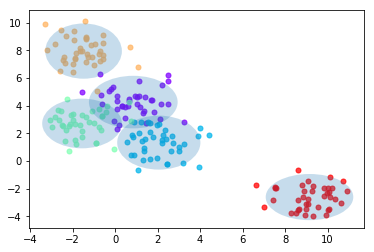

In [4]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

In [5]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [6]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


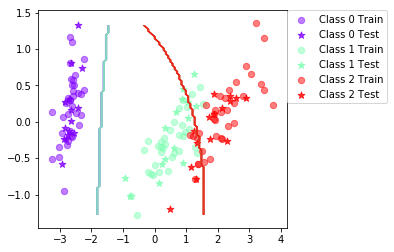

In [7]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

## Boosting helper functions


In [8]:
# in: base_classifier - classifier of the type that we will boost, BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        epsilon = np.sum(np.transpose(wCur) * (1. - np.equal(vote, labels)))
        if epsilon > 0.5:
            break
        if epsilon == 0.0:
            epsilon = np.amin(wCur) / 10000
        alpha = 0.5 * ((np.log(1.-epsilon)) - np.log(epsilon))
        w_true = (np.transpose(wCur) * np.equal(vote, labels)) * np.exp(-alpha)
        w_false = (np.transpose(wCur) * (1 - np.equal(vote, labels))) * np.exp(alpha)
        wCur = np.transpose((w_true + w_false) / np.sum(w_true + w_false))
        alphas.append(alpha) # you will need to append the new alpha
        # ==========================

    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        for class_x in range(Nclasses):
            for jdx in range(min(Ncomps, len(alphas))):
                delta_vote = classifiers[jdx].classify(X) == class_x # Idx is a vector with the indices in labels where class_x == labels
                votes[:,class_x] += delta_vote * alphas[jdx]
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The above functions can now be summarized into another class, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. 

In [9]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)




## Comparing the default classifiers to their boosted counterparts












 ## **Bayes classifier accuracy on the iris dataset**

In [10]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [11]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.7 with standard deviation 2.84


## ** Comparison of their boundry on the iris dataset**

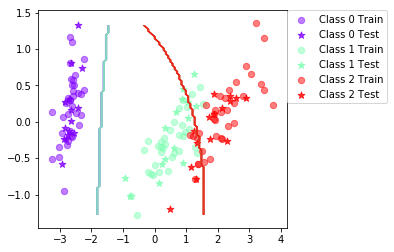

In [12]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

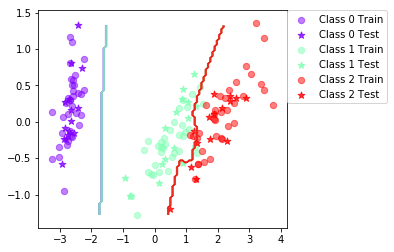

In [13]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

## **Bayes classifier accuracy on the vowel dataset**

In [14]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


In [15]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 85.7
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 79.9
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.42


## Comparison of their boundry on the vowel dataset

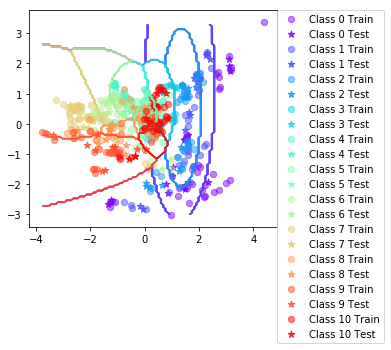

In [16]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='vowel',split=0.7)

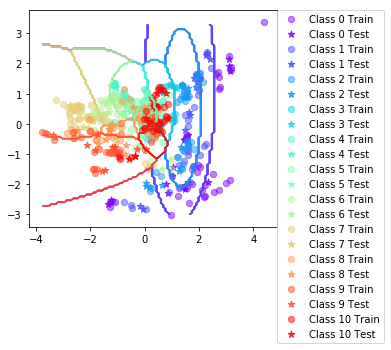

In [17]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

## Decision Tree accuracy on the iris dataset

In [18]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [19]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


## Comparison of their boundry on the iris dataset

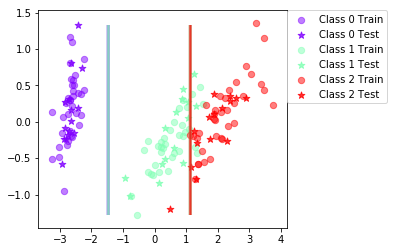

In [20]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

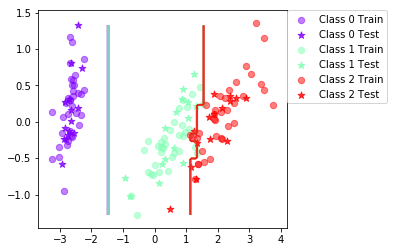

In [21]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

## Decision tree accuracy on the vowel dataset

In [22]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [23]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 85.7
Trial: 10 Accuracy 89.6
Trial: 20 Accuracy 86.4
Trial: 30 Accuracy 93.5
Trial: 40 Accuracy 84.4
Trial: 50 Accuracy 79.2
Trial: 60 Accuracy 90.3
Trial: 70 Accuracy 85.7
Trial: 80 Accuracy 85.1
Trial: 90 Accuracy 86.4
Final mean classification accuracy  86.9 with standard deviation 3.06


## Comparison of their boundry on the vowel dataset

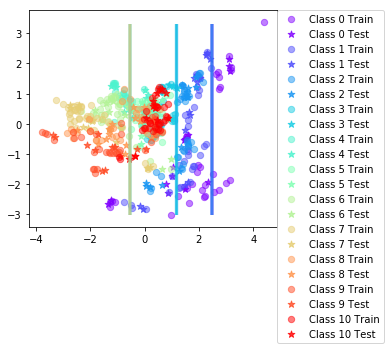

In [24]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='vowel',split=0.7)

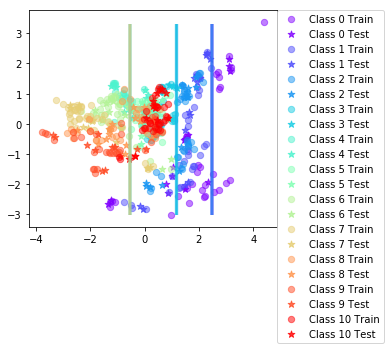

In [30]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

## Questions for assignment 5 (Bayes)

**(1) Is there any improvment in classification accuracy? Why/why not?**
Yes, both classifiers recieve improvements on their accuracies onto the dataset after being boosted. The idea behind boosting is to aggerate the individual classifiers that we generate into a single overall classifiers. Each iteration set of weights causes the algorithm to focus more on the incorrectly classified examples upon the next iteration. Thus the classifier places greater importance on what it "got wrong", and then tries to improve.

**(2) Plot the decision boundry of the boosted classifier on the iris and compare it with that of the basic. What differences do you notice? Is the boundry of the boosted version more complex?**
The right boundry tries alot harder to make up for its missclassifications that are shown in the first graph. It does it by completely changed the direction of the curve, and also adds an additional twist in order to attempt to deal with the datapoints that are overlapping with eachother in the right-center of the dataset(in the graph). Overall, this does increase the complexity of the boundry compared to the original graph that was generated by the default bayes classifier. 

**(3) Can we make up for not using a more advanced model in the basic classifier(e.g. independant features) by using boosting?**
Boosting a weak classifier can increase its accuracy to the dataset, but the number of iterations will eventually cause it to converge towards a upper threshold of how good it can actually become. That means that there is always a limit on how much a boosting algorithm can improve upon a simple model. If further accuracy is needed(which is not achivable by simply boosting), a more advanced model might be required.




## Questions for assignment 5 (Decision Trees)

**(1) Is there any improvment in classification accuracy? Why/why not?**
The effect of boosting the decision tree has a very minor improvement on the accuracy onto the iris set. Boosting is a method that works best by combining several high bias hypothesises to form a new, combined one with much lower bias. Descision trees, by their nature, tend to be low bias-high variance models, and thus are are more likely to recieve less improvement upon being boosted.

**(2) Plot the decision boundry of the boosted claffifier on the iris and compare i with that of the basic. What differences do you notice? Is the boundry of the boosted version more complex?**
The complexity of the boundry does increase as it attempts to work its way around the faulty datapoints. Due to the relatively poor boundry created by the initial classification, this graph is extremely susceptible to new points being added, due to how it has weighted the incorrect data points enough to basicly force the entire boundry-curve around them. 

**(3) Can we make up for not using a more advanced model in the basic classifier(e.g. independant features) by using boosting?**
See (3) about Bayes above




## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [26]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 85
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 89.2
Trial: 50 Accuracy 84.2
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 81.7
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.7 with standard deviation 3.03


In [27]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 85
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 89.2
Trial: 50 Accuracy 85
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 80
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.5 with standard deviation 3.13


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

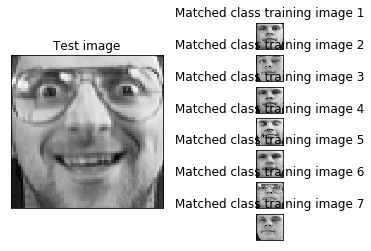

In [28]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(BayesClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])